Importing libraries

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import shap
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(suppress = True)
pd.options.display.max_colwidth = 100
np.random.seed(0)

# Data preparation

Functions (the second one is reported for completeness but we are not gonna use it)

In [3]:
def extract_dists(x,dists):
    '''
    A function to extract distributions from the dictionary dists,where:
    x is the name of the feature to extract in ''
    dists is the dictionary with all distributions
    '''
    import pandas as pd
    column_names = dists[x]['labels']
    values = [dists[x]['values']]
    pd_df = pd.DataFrame(data=values, columns=column_names)
    pd_df.index = pd.Index([x])
    return pd_df

def corr2df(corr):
    '''
    A function to create correlation dataframe from dictionary corr, where
    corr is the dictionary with the correlation matrix
    '''
    import pandas as df
    corr_df = pd.DataFrame(corr)
    corr_df.set_index('features', inplace=True)
    corr_df.index.name=None
    return corr_df

Distributions of categorical features, for the purpose of the exercise we removed the targets from the dictionary

In [4]:
dists = {
    'sex':{'labels':['M', 'F'], 'values':[0.4854368932,0.5145631068]},
    'lv_educ':{'labels':['Incomplete', 'Primary', 'Basic', 'Secondary', 'Higher'], 'values':[0.0595,0.07788016474,0.2309254283,0.4359496722,0.1957067711]},
    'empl_stat':{'labels':['Employers', 'Self-employed', 'Employed in private sector', 'Employed in public sector', 'Unpaid family workers'], 'values':[0.03631598652,0.07272557095,0.6708785723,0.2126544365,0.00742543367]},
    'marit_stat':{'labels':['Single', 'Married', 'Divorced', 'Widowed'], 'values':[0.397,0.443,0.058,0.102]},
    'house_memb':{'labels':['1', '2', '3', '4', '5', '6', '7+'], 'values':[0.1805,0.3778,0.2387,0.1157,0.0525,0.0238,0.011]},
    'chil_u_18_y':{'labels':['No children under 18', 'One child under 18', 'Two children under 18', 'Three children under 18', 'Four children under 18', 'Five children under 18', 'Six or more children under 18'], 'values':[0.422602157,0.36552047,0.183222339,0.020674764,0.004993779,0.001875149,0.001111341]},
    'nation':{'labels':['Bulgaria', 'EU', 'Other'], 'values':[0.9950198043,0.001146570676,0.003833625045]},
    'religion':{'labels':['Protestant', 'Catholic', 'Orthodox', 'Muslim', 'Other', 'No religion', 'I do not identify myself'], 'values':[0.011,0.008,0.76,0.1,0.002,0.047,0.072]},
    'soc_econ_stat':{'labels':['Economically active', 'Economically inactive'], 'values':[0.6151643031,0.3848356969]},
    'prof_ind':{'labels':['Agriculture, forestry and fisheries', 'Mining and processing industry', 'Utilities (electricity distribution and water supply)', 'Construction', 'Trade, automobile and motorcycle repair', 'Transportation, warehousing and mail', 'Hospitality and restaurant services', 'Creation and distribution of information and creative products', 'Telecommunications', 'Financial and administrative activities', 'Public administration', 'Education and research', 'Human health and social work', 'Other activities'], 'values':[0.03090815115,0.2353,0.029,0.05523651408,0.1645618594,0.06439111505,0.05161626582,0.03936261795,0.07356911161,0.04836124844,0.104946474,0.06006423384,0.04269692032]},
    'prof_stat':{'labels':['Management contract', 'Employment contract', 'Civil contract', 'Self-employed', 'Unemployed', 'Pensioner'], 'values':[0.01783393631,0.4732428049,0.02497602302,0.0385148509,0.167699009,0.277733376]},
    'count_house':{'labels':['0', '1', '2+'], 'values':[0.37,0.6,0.03]},
    'own_field':{'labels':['YES', 'NO'], 'values':[0.184481059,0.2621335023,0.5533854387]},
    'num_car_house':{'labels':['0', '1', '2', '3+'], 'values':[0.5714285714,0.36,0.06428571429,0.004285714286]},
    'own_rent_house':{'labels':['my own', 'rented'], 'values':[0.843,0.157]},
    'edu':{'labels':['Educational Sciences', 'Humanities', 'Social, Economic and Legal Sciences', 'Natural Sciences, Mathematics and Informatics', 'Technical Sciences', 'Agricultural Sciences and Veterinary Medicine', 'Health and Sports', 'Arts', 'Security and Defense'], 'values':[0.07591254907,0.0461889827,0.5266633332,0.04571641724,0.1533297557,0.01776640163,0.0930038303,0.02247374859,0.01891291637]},
    'temp':{'labels':['Choleric', 'Phlegmatic', 'Sanguine', 'Melancholic'], 'values':[0.38,0.11,0.23,0.28]},
    'invest_exp':{'labels':['0', '1-5', '6-10', '11-15', '16-25'], 'values':[0.7,0.2,0.06,0.03,0.01]},
    'shares':{'labels':['YES', 'NO'], 'values':[0.003394353314,0.9966056467]},
    'corp_oblig':{'labels':['YES', 'NO'], 'values':[0.0003792213936,0.9996207786]},
    'oth':{'labels':['YES', 'NO'], 'values':[0.000592597502012084,0.999407402497988]},
    'inv_fund':{'labels':['YES', 'NO'], 'values':[0.06491199709,0.9350880029]},
    'cash':{'labels':['YES', 'NO'], 'values':[0.04105169923,0.9589483008]},
    'crypto':{'labels':['YES', 'NO'], 'values':[0.003284135938,0.9967158641]},
    'gov_bond':{'labels':['YES', 'NO'], 'values':[0.06835666691,0.9316433331]},
    'deposits':{'labels':['YES', 'NO'], 'values':[0.8180293286,0.1819706714]},
    'banking':{'labels':['Online', 'Offline'], 'values':[0.09,0.91]},
    'bk_oprat':{'labels':['Up to 7', 'From 8 to 10', 'From 11 to 13', 'From 14 to 18', 'From 19 to more'], 'values':[0.0084,0.2424,0.4729,0.2615,0.0148]},
    'bk_dc':{'labels':['Under one', 'One', 'Two', 'Three'], 'values':[0.01,0.57,0.38,0.04]},
    'bk_cc':{'labels':['YES', 'NO'], 'values':[0.17,0.83]},
    'bk_acc':{'labels':['YES', 'NO'], 'values':[0.8634087377,0.1365912623]},
    'ins_prop':{'labels':['YES', 'NO'], 'values':[0.05,0.95]},
    'ins_life':{'labels':['YES', 'NO'], 'values':[0.09,0.91]},
    'ins_casco':{'labels':['YES', 'NO'], 'values':[0.03,0.97]},
    'health_ins':{'labels':['YES', 'NO'], 'values':[0.02,0.98]},
    'overdraft':{'labels':['YES', 'NO'], 'values':[0.19,0.81]},
    'cons_cred':{'labels':['YES', 'NO'], 'values':[0.26,0.74]},
    'mortgage':{'labels':['YES', 'NO'], 'values':[0.02,0.98]},
    'car_leas':{'labels':['YES', 'NO'], 'values':[0.2,0.8]},
    'pens_ins':{'labels':['YES', 'NO'], 'values':[0.11,0.89]}
}

Correcting mistakes in the features distribution dictionary. We observed that for two features number of labels and values are not the same. We corrected it manually below, in particular we removed 'Other activies' as a possible value for 'prof_ind' and we added the label 'unknown' for 'own_field.'

In [5]:
for _ in dists.keys():
    a = dists[_]['labels']
    p = dists[_]['values']
    if len(a) != len(p):
        print (_ + ', ' + str(len(a)) + ', ' + str(len(p)))
        print(dists[_])

prof_ind, 14, 13
{'labels': ['Agriculture, forestry and fisheries', 'Mining and processing industry', 'Utilities (electricity distribution and water supply)', 'Construction', 'Trade, automobile and motorcycle repair', 'Transportation, warehousing and mail', 'Hospitality and restaurant services', 'Creation and distribution of information and creative products', 'Telecommunications', 'Financial and administrative activities', 'Public administration', 'Education and research', 'Human health and social work', 'Other activities'], 'values': [0.03090815115, 0.2353, 0.029, 0.05523651408, 0.1645618594, 0.06439111505, 0.05161626582, 0.03936261795, 0.07356911161, 0.04836124844, 0.104946474, 0.06006423384, 0.04269692032]}
own_field, 2, 3
{'labels': ['YES', 'NO'], 'values': [0.184481059, 0.2621335023, 0.5533854387]}


In [6]:
dists['prof_ind'] = {'labels': ['Agriculture, forestry and fisheries', 'Mining and processing industry', 'Utilities (electricity distribution and water supply)', 'Construction', 'Trade, automobile and motorcycle repair', 'Transportation, warehousing and mail', 'Hospitality and restaurant services', 'Creation and distribution of information and creative products', 'Telecommunications', 'Financial and administrative activities', 'Public administration', 'Education and research', 'Human health and social work'], 'values': [0.03090815115, 0.2353, 0.029, 0.05523651408, 0.1645618594, 0.06439111505, 0.05161626582, 0.03936261795, 0.07356911161, 0.04836124844, 0.104946474, 0.06006423384, 0.04269692032]}
dists['own_field'] = {'labels': ['YES', 'NO', 'unkown'], 'values': [0.184481059, 0.2621335023, 0.5533854387]}

Pearson correlation matrix among numerical features

In [7]:
corr = {
    'features': ['age', 'ind_risk', 'income', 'pers_exp', 'house_exp', 'taxes', 'transp_telecom', 'hobby'],
    'age': [1, -0.00665947056405372, 0.00291644965339247, 0.0107779942638097, 0.00698674581731255, 0.00729153655132963, 0.0099866509330216, 0.00931630696561133],
    'ind_risk': [-0.00665947056405372, 1, 0.0039918072709289, 0.00806259039194059, 0.00457023635440603, 0.0061985340641631, 0.00768699810849585, -0.00332322616613201],
    'income': [0.00291644965339247, 0.0039918072709289, 1, 0.560949334881676, 0.58892666343229, 0.581907424628933, 0.562946509689962, 0.352350802339294],
    'pers_exp': [0.0107779942638097, 0.00806259039194059, 0.560949334881676, 1, 0.928449923861951, 0.929598634668897, 0.934775947642248, 0.714298364869941],
    'house_exp': [0.00698674581731255, 0.00457023635440603, 0.58892666343229, 0.928449923861951, 1, 0.93031279279417, 0.927846735467478, 0.679286362990223],
    'taxes': [0.00729153655132963, 0.0061985340641631, 0.581907424628933, 0.929598634668897, 0.93031279279417, 1, 0.92920510128812, 0.689442053350162],
    'transp_telecom': [0.0099866509330216, 0.00768699810849585, 0.562946509689962, 0.934775947642248, 0.927846735467478, 0.92920510128812, 1, 0.714114127908189],
    'hobby': [0.00931630696561133, -0.00332322616613201, 0.352350802339294, 0.714298364869941, 0.679286362990223, 0.689442053350162, 0.714114127908189, 1]
}

In [8]:
corr_df = corr2df(corr)

Creation of the dataframe. We create separately the dataframe of non-numeric features (based on distribution) and the dataframe of numeric features (based on correlation), then we merge them. Note that even though most of the numeric features are categorical (according to data dictionary), we initially considered them as continuous so it makes sense to assume that they are normally distributed, they will be later categorized. 

Initial length of the dataframe. It will be reduced through business rules.

In [9]:
length = 70000

In [10]:
cat_var_df = pd.DataFrame() 

Note that we, instead of the probability distribution vector p, we use here below p divided by the sum of its components. Without this change, we received error that the sum of the probabilities is not 1. We read it's common practice to tackle this issue in this way.

In [11]:
for _ in dists.keys():
    p = np.array(dists[_]['values'])
    cat_var_df[_] = np.random.choice(a = dists[_]['labels'], size=length, p = p/p.sum())                   

To generate the numeric features with the given correlation matrix, we used Cholesky decomposition. As a first step, we generated normally distributed random variables with mean 0 and standard deviation = 1, the actual means will be then added later on. When generating random variables, we have some spurious correlation and this led the results of the Cholesky decomposition to be non optimal (meaning that the correlation matrix was slightly different from the one assigned). So, we decided to refine this approach, by using the Cholesky decomposition twice: once to the inverse of the spurios correlation matrix to obtain uncorrelated random variables and then to the correlation matrix provided in the instructions. We hope the names of the variables will help understand the various steps. 

In [12]:
random_num_var = np.random.randn(len(corr['features']), length)

Removing residual correlation

In [13]:
residual_corr = np.linalg.inv(np.corrcoef(random_num_var))
chol_1 = np.linalg.cholesky(residual_corr)
uncorr_num_var = np.dot(chol_1, random_num_var)

Creating variables with the requested correlation

In [14]:
chol_2 = np.linalg.cholesky(corr_df)
corr_num_var = np.dot(chol_2, uncorr_num_var)
num_var_df = pd.DataFrame((corr_num_var).T, columns=corr['features']) 
num_var_df

,age,ind_risk,income,pers_exp,house_exp,taxes,transp_telecom,hobby
0,0.197597,1.723989,0.777965,1.088047,0.567980,0.868393,0.512842,1.665034
1,0.169654,-0.106532,-0.606627,-1.483536,-1.150274,-1.500685,-0.700266,-1.259145
2,0.626905,-1.241114,2.294546,0.906293,0.687231,0.823838,0.824556,0.848589
3,0.977462,-0.805672,-0.445869,-2.113964,-1.654715,-1.604722,-1.499750,-0.998975
4,-0.629191,-1.742219,-0.861878,-2.319986,-1.491540,-2.065550,-1.995944,-0.905145
...,...,...,...,...,...,...,...,...
69995,0.658622,-1.422879,-0.092348,-0.150219,0.277581,0.111177,-0.073158,-0.287976
69996,-0.684363,-0.037407,-1.568272,-0.356852,-0.426264,-0.339038,-0.310572,0.042511
69997,-2.476107,-1.289317,0.190216,1.694487,1.581452,1.602250,1.448433,1.899191
69998,0.917279,1.458694,0.982747,0.756498,0.845301,1.254537,0.819168,0.512817


We rescale the numerical features so that they vary in the intervals described in the data dictionary.

In [15]:
num_var_df['age'] = MinMaxScaler(feature_range=(20, 85)).fit_transform(num_var_df[['age']])
num_var_df['ind_risk'] = MinMaxScaler(feature_range=(0, 1)).fit_transform(num_var_df[['ind_risk']])
num_var_df['income'] = MinMaxScaler(feature_range=(0, 100000)).fit_transform(num_var_df[['income']])
num_var_df['pers_exp'] = MinMaxScaler(feature_range=(0, 6000)).fit_transform(num_var_df[['pers_exp']])
num_var_df['house_exp'] = MinMaxScaler(feature_range=(0, 4000)).fit_transform(num_var_df[['house_exp']])
num_var_df['taxes'] = MinMaxScaler(feature_range=(0, 2500)).fit_transform(num_var_df[['taxes']])
num_var_df['transp_telecom'] = MinMaxScaler(feature_range=(0, 2500)).fit_transform(num_var_df[['transp_telecom']])
num_var_df['hobby'] = MinMaxScaler(feature_range=(0, 3000)).fit_transform(num_var_df[['hobby']])

We round to integers all the numerical features except for 'ind_risk'.

In [16]:
num_var_df[['age', 'income', 'pers_exp', 'house_exp', 'taxes', 'transp_telecom', 'hobby']] = num_var_df[['age', 'income', 'pers_exp', 'house_exp', 'taxes', 'transp_telecom', 'hobby']].astype(int)

We categorized the numerical features according to the bins described in the data dictionary (a bin was missing for 'income' so we added it).

In [17]:
categorized = {'income': {'criteria': [num_var_df['income'].between(0, 6121), num_var_df['income'].between(6122, 12001), 
                           num_var_df['income'].between(12002, 27601), num_var_df['income'].between(27602, 43201), 
                           num_var_df['income'].between(43202, 58801), num_var_df['income'].between(58802, 74401), 
                           num_var_df['income'].between(74402, 90001), num_var_df['income'].between(90002, 100000)],
                          'values':      
                          ['Up to 6121', 'Up to 12001', 'Up to 27601', 'Up to 43201', 'Up to 58801', 'Up to 74401', 
                           'Up to 90001', 'Over 90001+']},
              'pers_exp': {'criteria': [num_var_df['pers_exp'].between(0, 4500), num_var_df['pers_exp'].between(4501, 5000),
                           num_var_df['pers_exp'].between(5001, 5500), num_var_df['pers_exp'].between(5501, 6000)],
                           'values':
                          ['up to 4500', 'up to 5000', 'up to 5500', 'up to 6000']},
               'house_exp': {'criteria': [num_var_df['house_exp'].between(0, 500), num_var_df['house_exp'].between(501, 1500),
                           num_var_df['house_exp'].between(1501, 3000), num_var_df['house_exp'].between(3001, 4000)],
                           'values':
                          ['up to 500', 'up to 1500', 'up to 3000', 'up to 4000']},
               'taxes': {'criteria': [num_var_df['taxes'].between(0, 500), num_var_df['taxes'].between(501, 1000),
                           num_var_df['taxes'].between(1001, 2000), num_var_df['taxes'].between(2001, 2500)],
                           'values':
                          ['up to 500', 'up to 1000', 'up to 2000', 'up to 2500']},
               'transp_telecom': {'criteria': [num_var_df['transp_telecom'].between(0, 500), num_var_df['transp_telecom'].between(501, 1000),
                           num_var_df['transp_telecom'].between(1001, 1500), num_var_df['transp_telecom'].between(1501, 2500)],
                           'values':
                          ['up to 500', 'up to 1000', 'up to 1500', 'up to 2500']},
               'hobby': {'criteria': [num_var_df['hobby'].between(0, 1), num_var_df['hobby'].between(1, 1500),
                           num_var_df['hobby'].between(1501, 2000), num_var_df['hobby'].between(2001, 3000)],
                           'values':
                          ['0', 'up to 1500', 'up to 2000', 'up to 3000']}}

for _ in categorized.keys():
    num_var_df[_] = np.select(categorized[_]['criteria'], categorized[_]['values'], 0)
num_var_df

,age,ind_risk,income,pers_exp,house_exp,taxes,transp_telecom,hobby
0,55,0.682953,Up to 74401,up to 4500,up to 3000,up to 2000,up to 1500,up to 3000
1,55,0.472672,Up to 58801,up to 4500,up to 1500,up to 1000,up to 1500,up to 1500
2,59,0.342336,Up to 90001,up to 4500,up to 3000,up to 2000,up to 1500,up to 2000
3,62,0.392358,Up to 58801,up to 4500,up to 1500,up to 1000,up to 1000,up to 1500
4,48,0.284772,Up to 43201,up to 4500,up to 1500,up to 1000,up to 1000,up to 1500
...,...,...,...,...,...,...,...,...
69995,59,0.321456,Up to 58801,up to 4500,up to 3000,up to 2000,up to 1500,up to 1500
69996,48,0.480612,Up to 43201,up to 4500,up to 3000,up to 2000,up to 1500,up to 2000
69997,33,0.336799,Up to 58801,up to 4500,up to 3000,up to 2000,up to 2500,up to 3000
69998,61,0.652477,Up to 74401,up to 4500,up to 3000,up to 2000,up to 1500,up to 2000


We now obtain the dataset concatening the two datasets created

In [18]:
df_without_rules = pd.concat([cat_var_df, num_var_df], axis = 1)
df_without_rules.shape

(70000, 48)

Business rules. Reduntant rules and rules which involve values outside the data dictionary's intervals were ignored. 

In [19]:
df = df_without_rules
df = df.drop(df[(df['marit_stat'] == 'Married') & (df['house_memb'] <= '2')].index)
df = df.drop(df[(df['prof_ind'] == 'Financial and administrative activities') & (df['invest_exp'] == '0')].index)
df = df.drop(df[(df['age'] < 25) & (df['invest_exp'] != '0')].index)
df = df.drop(df[(df['age'] < 25) & (df['lv_educ'] == 'Higher')].index)
df = df.drop(df[(df['age'] < 25) & (~df['chil_u_18_y'].isin(['No children under 18', 'One child under 18']))].index)
df = df.drop(df[(df['invest_exp'] != '0') & (df['deposits'] == 'NO')].index)
df = df.drop(df[(df['shares'] == 'YES') & (df['invest_exp'] == '0')].index)
df = df.drop(df[(df['gov_bond'] == 'YES') & (df['invest_exp'] == '0')].index)
df = df.drop(df[(df['oth'] == 'YES') & (df['invest_exp'] == '0')].index)
df = df.drop(df[(df['inv_fund'] == 'YES') & (df['invest_exp'] == '0')].index)
df = df.drop(df[(df['cash'] == 'YES') & (df['invest_exp'] == '0')].index)
df = df.drop(df[(df['crypto'] == 'YES') & (df['invest_exp'] == '0')].index)
df = df.drop(df[(df['corp_oblig'] == 'YES') & (df['invest_exp'] == '0')].index)
df = df.drop(df[(df['age'] < 25) & (df['bk_acc'] == 'YES')].index)
df = df.drop(df[(df['lv_educ'] == 'Higher') & (df['income'].isin(['Up to 6121', 'Up to 12001', 'Up to 27601']))].index)
df = df.drop(df[(~df['chil_u_18_y'].isin(['No children under 18', 'One child under 18'])) & (df['house_memb'] <= '3')].index)
df = df.drop(df[(df['lv_educ'] == 'Higher') & (df['soc_econ_stat'] != 'Economically active')].index)

df.shape

(32582, 48)

We now need to assign the targets columns to the dataset we created. In order to assign targets in a meaningful way, we will use unsupervised clustering, in particular K-Means. Details will be provided in the following. 

First of all, we create a copy of our dataset in which we will replace categorical values with numerical ones.

In [20]:
df_with_targets = df.copy()
le = LabelEncoder()
for _ in list(dists.keys()) + list(categorized.keys()):
    label = le.fit_transform(df_with_targets[_])
    df_with_targets.drop(_, axis=1, inplace=True)
    df_with_targets[_] = label
df_with_targets.head(10)

,age,ind_risk,sex,lv_educ,empl_stat,marit_stat,house_memb,chil_u_18_y,nation,religion,...,cons_cred,mortgage,car_leas,pens_ins,income,pers_exp,house_exp,taxes,transp_telecom,hobby
0,55,0.682953,0,4,3,2,0,3,0,4,...,0,0,1,0,6,0,1,1,1,3
1,55,0.472672,0,3,1,1,2,2,0,4,...,0,0,0,0,4,0,0,0,1,1
2,59,0.342336,0,4,0,2,3,6,0,4,...,0,0,0,0,7,0,1,1,1,2
6,40,0.378743,1,4,0,1,2,2,0,1,...,0,0,0,0,6,1,1,1,2,3
7,69,0.469744,0,3,0,3,3,2,0,2,...,0,0,0,0,4,0,1,1,0,1
8,80,0.389711,0,3,0,2,2,2,0,4,...,0,0,0,0,4,0,1,1,1,1
10,48,0.412779,0,1,0,0,2,2,0,4,...,0,1,0,0,4,0,0,0,0,1
13,51,0.494608,0,0,0,2,3,2,0,4,...,1,0,0,0,4,0,1,1,1,1
14,56,0.591030,1,0,0,2,2,3,0,4,...,1,0,0,0,4,0,1,1,1,2
17,53,0.590556,0,1,0,2,2,3,0,2,...,1,0,0,0,3,0,0,0,1,1


Since we will use a distance based algorithm (K-means), to avoid the curse of dimensionality, we will reduce the number of our features using PCA. First, we remove binary features since it's questionable whether to apply PCA to them and then we normalize the remaining features.

In [21]:
df_with_targets = df_with_targets.loc[:,df_with_targets.nunique() != 2]
normalized_df = MinMaxScaler().fit_transform(df_with_targets)
pca_df = PCA(n_components=5)
principalComponents_df = pca_df.fit_transform(normalized_df)
principal_df = pd.DataFrame(data = principalComponents_df
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principal_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,-0.532146,-0.016809,0.250354,0.411617,-0.317001
1,-0.036984,0.217055,0.606870,-0.271149,-0.227421
2,-0.203883,0.364212,-0.407165,-0.288710,0.488169
3,0.121175,0.746220,-0.406898,-0.260874,-0.361140
4,-0.357643,-0.164299,0.599496,-0.270988,0.069521
5,-0.348290,-0.173933,0.585264,0.359460,0.481484
6,0.041737,-0.488504,-0.048134,0.355641,-0.239788
7,0.868090,0.118022,-0.047058,0.396405,-0.263075
8,0.238322,-0.656993,-0.053407,-0.242837,-0.230417
9,0.028801,-0.481092,0.618961,-0.311395,0.522584


In the code below, we list the most ten important original features for first two principal components.  

In [22]:
def create_importance_dataframe(model, df): 
    importance_df  = pd.DataFrame(model.components_)
    importance_df.columns  = df.columns
    importance_df =importance_df.apply(np.abs)
    importance_df=importance_df.transpose()
    num_pcs = importance_df.shape[1]
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]
    importance_df.columns  =new_columns
    return importance_df

pca = PCA(n_components=5).fit(normalized_df)
importance_df  =create_importance_dataframe(pca, df_with_targets)

pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 features are \n')
display(pc1_top_10_features )

pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 features are \n')
display(pc2_top_10_features )


PC1 top 10 features are 



lv_educ        0.770322
own_field      0.636887
temp           0.021928
prof_stat      0.012451
bk_dc          0.011405
prof_ind       0.008801
bk_oprat       0.006369
count_house    0.004780
marit_stat     0.004516
hobby          0.003632
Name: PC1, dtype: float64


PC2 top 10 features are 



own_field         0.770741
lv_educ           0.636713
temp              0.009536
count_house       0.009349
transp_telecom    0.007844
empl_stat         0.007090
bk_oprat          0.006107
edu               0.005983
prof_stat         0.005919
bk_dc             0.005683
Name: PC2, dtype: float64

The below function provides as output the list of clusters with the percentage of points belonging to each cluster, ordered by increasing percentage. Our approach to assign the targets is the following: we consider one of the 3 clusters and we assign target 'YES' randomly selecting the desidered amount of datapoints belonging to this target. In particular, we set n_clusters = 3 because we observed that in this case the second cluster for dimension contains slightly more than 31% of the observations, which is the highest percentage of 'YES' among the targets ('cons_cred_app', 31%). The reasoning behid this approach is the following: first, we assume that one of this three clusters may isolate somehow the clients propense to buy 'cons_cred_app'. Second, we assume that clients propense to buy a certain product will be propense to buy also other products so, from the same cluster representing clients propense to 'cons_cred_app', we randomly sample clients propense to the other products in such a way that their percentages are the ones reported in the instructions. 

In [23]:
def clusters_percentages(df):
    clusters = KMeans(n_clusters = 3, random_state = 0, n_init = 10).fit(df)
    counts = dict(Counter(clusters.labels_))
    counts.update((x, y/len(df)) for x, y in counts.items())
    counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=False))
    return [list(counts.items()), clusters]

In [24]:
x = clusters_percentages(df = principal_df)
x

[[(0, 0.27337180038057823), (2, 0.3138235835737524), (1, 0.41280461604566937)],
 KMeans(n_clusters=3, random_state=0)]

In [25]:
targets_distributions = {'overdraft_app': 0.24, 'cons_cred_app': 0.31, 'mortgage_app': 0.03, 'bk_cc_app': 0.21}
y = list(df.loc[x[1].labels_ == x[0][1][0]].index)
for _ in list(targets_distributions.keys()):
    df[_] = 'NO'
    df.loc[random.sample(y, int(targets_distributions[_] * len(df))), _] = 'YES'

In [26]:
df.rename(columns = {'overdraft_app':'overdraft_target', 'cons_cred_app':'cons_cred_target', 'mortgage_app':'mortgage_target', 
                             'bk_cc_app':'bk_cc_target'}, inplace = True)
df

,sex,lv_educ,empl_stat,marit_stat,house_memb,chil_u_18_y,nation,religion,soc_econ_stat,prof_ind,...,income,pers_exp,house_exp,taxes,transp_telecom,hobby,overdraft_target,cons_cred_target,mortgage_target,bk_cc_target
0,F,Secondary,Self-employed,Single,1,One child under 18,Bulgaria,Orthodox,Economically active,Education and research,...,Up to 74401,up to 4500,up to 3000,up to 2000,up to 1500,up to 3000,NO,NO,NO,NO
1,F,Primary,Employed in public sector,Married,3,No children under 18,Bulgaria,Orthodox,Economically inactive,Telecommunications,...,Up to 58801,up to 4500,up to 1500,up to 1000,up to 1500,up to 1500,NO,NO,NO,NO
2,F,Secondary,Employed in private sector,Single,4,Two children under 18,Bulgaria,Orthodox,Economically active,Telecommunications,...,Up to 90001,up to 4500,up to 3000,up to 2000,up to 1500,up to 2000,NO,NO,NO,NO
6,M,Secondary,Employed in private sector,Married,3,No children under 18,Bulgaria,I do not identify myself,Economically active,Human health and social work,...,Up to 74401,up to 5000,up to 3000,up to 2000,up to 2500,up to 3000,NO,NO,NO,NO
7,F,Primary,Employed in private sector,Widowed,4,No children under 18,Bulgaria,Muslim,Economically inactive,Education and research,...,Up to 58801,up to 4500,up to 3000,up to 2000,up to 1000,up to 1500,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69991,M,Incomplete,Employed in private sector,Single,3,No children under 18,Bulgaria,I do not identify myself,Economically inactive,Mining and processing industry,...,Up to 58801,up to 4500,up to 3000,up to 2000,up to 1500,up to 2000,NO,NO,NO,NO
69992,M,Incomplete,Employed in private sector,Single,5,One child under 18,Bulgaria,Orthodox,Economically inactive,Mining and processing industry,...,Up to 58801,up to 4500,up to 1500,up to 1000,up to 1000,up to 1500,NO,NO,NO,NO
69993,F,Incomplete,Unpaid family workers,Married,4,No children under 18,Bulgaria,Orthodox,Economically inactive,Public administration,...,Up to 58801,up to 4500,up to 3000,up to 2000,up to 1500,up to 1500,YES,YES,NO,YES
69995,F,Secondary,Employed in private sector,Divorced,3,One child under 18,Bulgaria,I do not identify myself,Economically inactive,Financial and administrative activities,...,Up to 58801,up to 4500,up to 3000,up to 2000,up to 1500,up to 1500,NO,NO,NO,NO


# Propensity models - non imbalanced data

In this section we are gonna explore different models in the cases of non imbalanced data (all the targets except 'mortgage'). The metric that we will consider in this case is AUC ROC. In order to develop the propensity models, we proceed with data pre-processing. In particular, for columns with only two values 'YES' or 'NO' we replace them respectively with 1 and 0. For other columns we use LabelEncoder to transform categorical values into numerical ones. 

In [27]:
df_ = df.copy()

binary_cols= [col for col in df_.columns if len(df_[col].unique())==2]
df_[binary_cols] = df_[binary_cols].replace({'YES': 1, 'NO': 0})

columns_to_be_transformed =  [col for col in df_.columns if col not in df_.describe().columns]

le = LabelEncoder()
for _ in columns_to_be_transformed:
    label = le.fit_transform(df_[_])
    df_.drop(_, axis=1, inplace=True)
    df_[_] = label

We investigate the presence of highly correlated columns. We see that only two columns are highly correlated: 'overdraft_target'
and 'cons_cred_target'. Since, when developing a model for a target, the other targets will not be used as predictors, this is not relevant. 

In [28]:
indices = np.where((df_.corr().to_numpy() > 0.7) | (df_.corr().to_numpy() < -0.7))
indices = [(df_.columns[x], df_.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('overdraft_target', 'cons_cred_target'),
 ('cons_cred_target', 'bk_cc_target'),
 ('cons_cred_target', 'lv_educ')]

We now split the data in 3 parts: train, test and validation with percenatge respectively 60%, 20% and 20%. The same split will be adopted for all the models in order to make their comparison more consinstent. Since for some algorithms we will need standardized data, we also define 'X_train_std' and 'X_test_std' (see below). 

In [29]:
df_train_, df_test = train_test_split(df_, test_size=0.2, random_state=0)

df_train, df_val = train_test_split(df_train_, test_size=0.25, random_state=0)

In [30]:
targets = ['overdraft_target', 'cons_cred_target', 'bk_cc_target', 'mortgage_target']
X_train = df_train.drop(columns= targets, axis=1)
X_test = df_test.drop(columns= targets, axis=1)
X_valid = df_val.drop(columns= targets, axis=1)
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

# 1) Logistic Regression

In [31]:
lr_performances = {}
lr = LogisticRegression(random_state=0, max_iter = 1100)
for target in targets[:-1]:
    y_train = df_train[target]
    y_test = df_test[target] 
    lr.fit(X_train, y_train)
    y_train_hat = lr.predict(X_train)
    y_train_hat_probs = lr.predict_proba(X_train)[:,1]
    train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)
    y_test_hat = lr.predict(X_test)
    y_test_hat_probs = lr.predict_proba(X_test)[:,1]
    test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)
    lr_performances[target] = {'train auc roc': train_auc_roc,
                              'test auc roc': test_auc_roc}
lr_performances

{'overdraft_target': {'train auc roc': 0.9505886737389506,
  'test auc roc': 0.9511012514238469},
 'cons_cred_target': {'train auc roc': 0.9972320753515009,
  'test auc roc': 0.9974521175731483},
 'bk_cc_target': {'train auc roc': 0.9363767199298203,
  'test auc roc': 0.9381876694258006}}

# 2) Support Vector Classification

In [32]:
svc_performances = {}
svc = SVC(random_state=0, probability = True)
for target in targets[:-1]:
    y_train = df_train[target]
    y_test = df_test[target] 
    svc.fit(X_train_std, y_train)
    y_train_hat = svc.predict(X_train_std)
    y_train_hat_probs = svc.predict_proba(X_train_std)[:,1]
    train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)
    y_test_hat = svc.predict(X_test_std)
    y_test_hat_probs = svc.predict_proba(X_test_std)[:,1]
    test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)
    svc_performances[target] = {'train auc roc': train_auc_roc,
                              'test auc roc': test_auc_roc}
svc_performances

{'overdraft_target': {'train auc roc': 0.9663843916674909,
  'test auc roc': 0.949826978363252},
 'cons_cred_target': {'train auc roc': 0.9976153131542658,
  'test auc roc': 0.9971949897891774},
 'bk_cc_target': {'train auc roc': 0.9603132477955743,
  'test auc roc': 0.9360889710536809}}

# 3) Gradient Boosting classifier

In [33]:
gbc_performances = {}
gbc = GradientBoostingClassifier(random_state = 0)
for target in targets[:-1]:
    y_train = df_train[target]
    y_test = df_test[target] 
    gbc.fit(X_train, y_train)
    y_train_hat = gbc.predict(X_train)
    y_train_hat_probs = gbc.predict_proba(X_train)[:,1]
    train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)
    y_test_hat = gbc.predict(X_test)
    y_test_hat_probs = gbc.predict_proba(X_test)[:,1]
    test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)
    gbc_performances[target] = {'train auc roc': train_auc_roc,
                              'test auc roc': test_auc_roc}
gbc_performances

{'overdraft_target': {'train auc roc': 0.9631282027024897,
  'test auc roc': 0.9520920563069165},
 'cons_cred_target': {'train auc roc': 0.9995528689330002,
  'test auc roc': 0.996817946654467},
 'bk_cc_target': {'train auc roc': 0.9520587157773556,
  'test auc roc': 0.9384285642413177}}

# Compare performances - non imbalanced data

In [34]:
models = ['logistic regression', 'support vector classifier', 'gradient boosting classifier']
performances = pd.DataFrame(data=[lr_performances, svc_performances, gbc_performances])
performances['index'] = models
performances = performances.set_index('index')
performances

,overdraft_target,cons_cred_target,bk_cc_target
index,,,
logistic regression,"{'train auc roc': 0.9505886737389506, 'test auc roc': 0.9511012514238469}","{'train auc roc': 0.9972320753515009, 'test auc roc': 0.9974521175731483}","{'train auc roc': 0.9363767199298203, 'test auc roc': 0.9381876694258006}"
support vector classifier,"{'train auc roc': 0.9663843916674909, 'test auc roc': 0.949826978363252}","{'train auc roc': 0.9976153131542658, 'test auc roc': 0.9971949897891774}","{'train auc roc': 0.9603132477955743, 'test auc roc': 0.9360889710536809}"
gradient boosting classifier,"{'train auc roc': 0.9631282027024897, 'test auc roc': 0.9520920563069165}","{'train auc roc': 0.9995528689330002, 'test auc roc': 0.996817946654467}","{'train auc roc': 0.9520587157773556, 'test auc roc': 0.9384285642413177}"


# Explainability

We "explain" Gradient Boosting by calculating Shap values for each target. In particular, we fit each model on the train set and explain the prediction on the test set. Here we plot the results in two types of graph. 

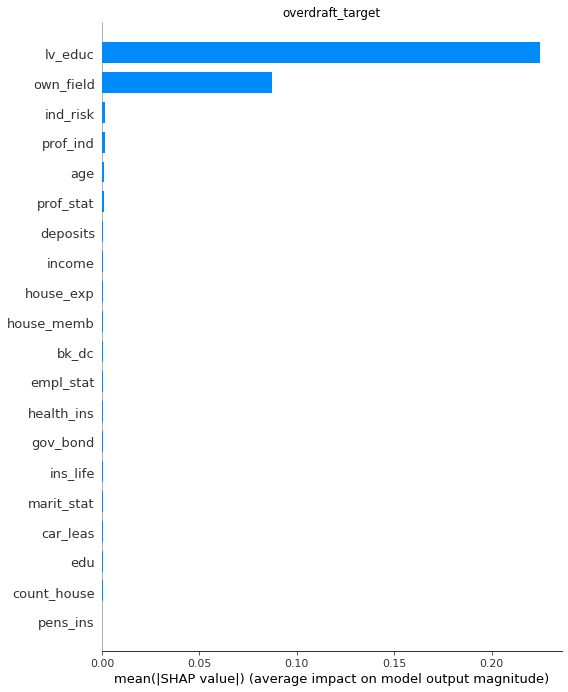

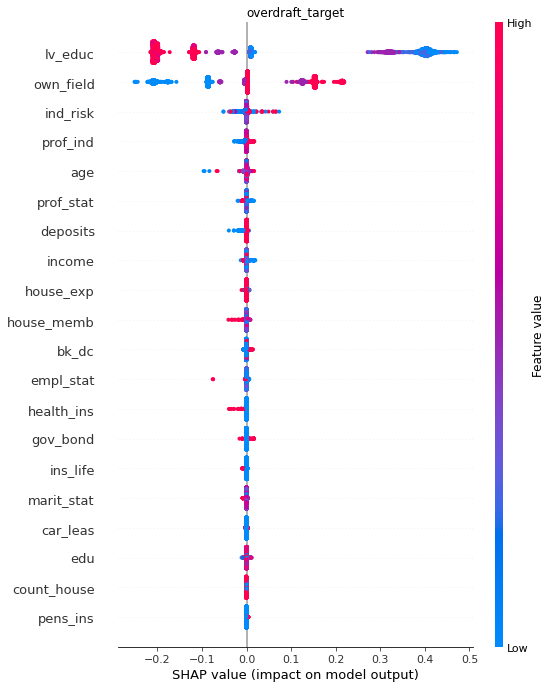

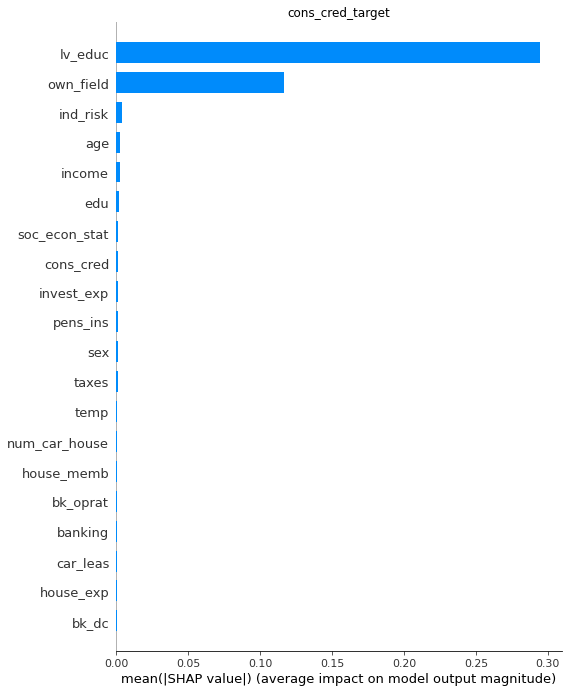

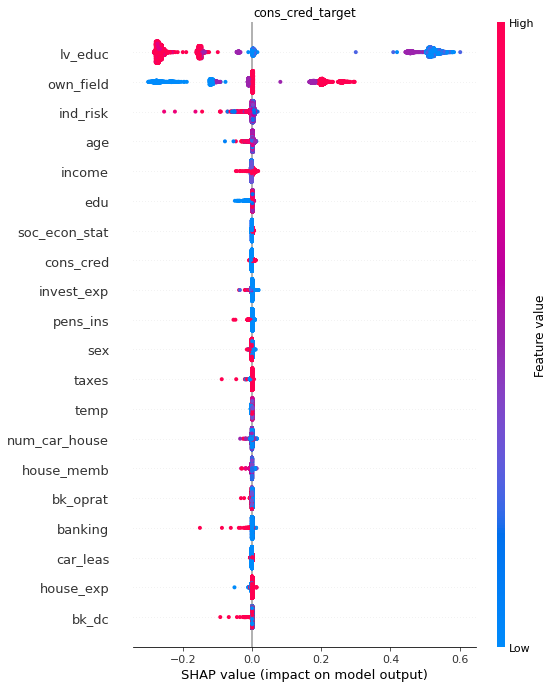

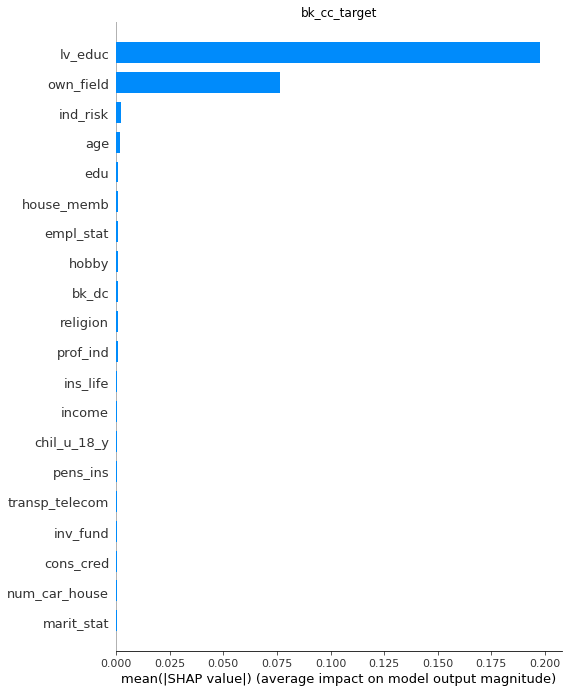

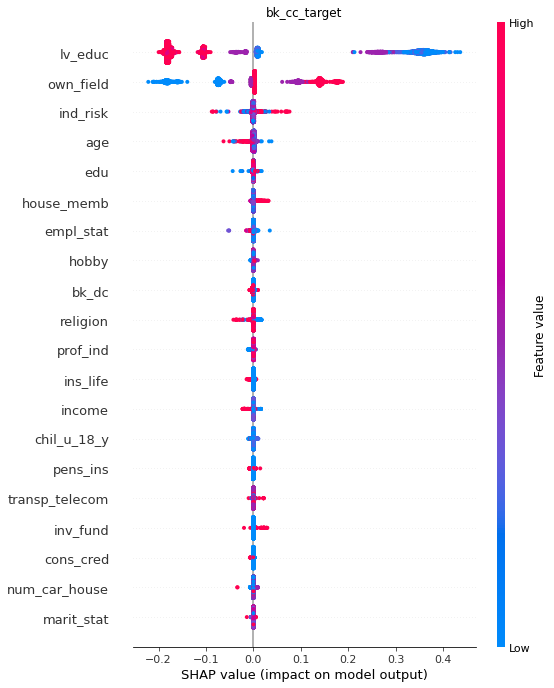

In [35]:
%matplotlib inline
for target in targets[:-1]:
    y_train = df_train[target]
    y_test = df_test[target] 
    gbc.fit(X_train, y_train)
    explainer = shap.TreeExplainer(gbc, X_train, model_output='probability', feature_perturbation='interventional')
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, plot_type = 'bar', show = False)
    plt.title(target)
    plt.show()
    shap.summary_plot(shap_values, plot_type = 'dot', show = False)
    plt.title(target)
    plt.show()

As we can see from the plots, for each target, the same two features are particularly influential compared to the others: 'lv_educ' and 'own_field'.

In the following two codes, we will train by Gradient Boosting classifier two type of models:
1) using only these two features and 
2) without these two features.

The first part can be regarded as an application of SHAP to feature reduction.

In [36]:
most_important_features = ['lv_educ', 'own_field']

gbc_performances_mif = {}
gbc = GradientBoostingClassifier(random_state = 0)
for target in targets[:-1]:
    y_train = df_train[target]
    y_test = df_test[target] 
    gbc.fit(X_train[most_important_features], y_train)
    y_train_hat = gbc.predict(X_train[most_important_features])
    y_train_hat_probs = gbc.predict_proba(X_train[most_important_features])[:,1]
    train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)
    y_test_hat = gbc.predict(X_test[most_important_features])
    y_test_hat_probs = gbc.predict_proba(X_test[most_important_features])[:,1]
    test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)
    gbc_performances_mif[target] = {'train auc roc': train_auc_roc,
                              'test auc roc': test_auc_roc}
gbc_performances_mif

{'overdraft_target': {'train auc roc': 0.9508471618412019,
  'test auc roc': 0.9531014684653526},
 'cons_cred_target': {'train auc roc': 0.9976866716945849,
  'test auc roc': 0.996725473790374},
 'bk_cc_target': {'train auc roc': 0.9353711783875768,
  'test auc roc': 0.9381096450873233}}

In [37]:
gbc_performances_wmif = {}
gbc = GradientBoostingClassifier(random_state = 0)
for target in targets[:-1]:
    y_train = df_train[target]
    y_test = df_test[target] 
    gbc.fit(X_train.drop(columns= most_important_features, axis=1), y_train)
    y_train_hat = gbc.predict(X_train.drop(columns= most_important_features, axis=1))
    y_train_hat_probs = gbc.predict_proba(X_train.drop(columns= most_important_features, axis=1))[:,1]
    train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)
    y_test_hat = gbc.predict(X_test.drop(columns= most_important_features, axis=1))
    y_test_hat_probs = gbc.predict_proba(X_test.drop(columns= most_important_features, axis=1))[:,1]
    test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)
    gbc_performances_wmif[target] = {'train auc roc': train_auc_roc,
                              'test auc roc': test_auc_roc}
gbc_performances_wmif

{'overdraft_target': {'train auc roc': 0.6310852888183667,
  'test auc roc': 0.5388559596500583},
 'cons_cred_target': {'train auc roc': 0.6312982588844975,
  'test auc roc': 0.5337533715451018},
 'bk_cc_target': {'train auc roc': 0.6381706516629968,
  'test auc roc': 0.5354841616277725}}

The performance of models without the most two important fetaures (measured on the test sample) is closed to random model, the model with only the two most important features has performance almost the same as the model trained on all feautures.

# Propensity models - imbalanced data

In this section we will develop propensity model for the 'mortgage' target. Since in this case we are dealing with imbalanced data we will run the models from the previous section focusing on AUC PR metric for comparison. Moreover, we are gonna explore another approach for this particular case. In particular, we will develop an approach based on Isolation Forest which combines unsupervised and supervised learning, details in the following. 

In [38]:
y_train_imb = df_train['mortgage_target']
y_test_imb = df_test['mortgage_target'] 
y_val_imb = df_val['mortgage_target'] 

# 1) Logistic Regression

In [39]:
lr_performances_imb = {}
lr = LogisticRegression(random_state=0, max_iter = 1100)
lr.fit(X_train, y_train_imb)
y_train_hat = lr.predict(X_train)
y_train_hat_probs = lr.predict_proba(X_train)[:,1]
train_avg_pr = average_precision_score(y_train_imb, y_train_hat_probs)
y_test_hat = lr.predict(X_test)
y_test_hat_probs = lr.predict_proba(X_test)[:,1]
test_avg_pr = average_precision_score(y_test_imb, y_test_hat_probs)
lr_performances_imb['mortgage_target'] = {'train avg pr': train_avg_pr,
                              'test avg pr': test_avg_pr}
lr_performances_imb

{'mortgage_target': {'train avg pr': 0.1064814983540973,
  'test avg pr': 0.08324629990035239}}

# 2) Support vector classification

In [40]:
svc_performances_imb = {}
svc = SVC(random_state=0, probability = True)
svc.fit(X_train_std, y_train_imb)
y_train_hat = svc.predict(X_train_std)
y_train_hat_probs = svc.predict_proba(X_train_std)[:,1]
train_avg_pr = average_precision_score(y_train_imb, y_train_hat_probs)
y_test_hat = svc.predict(X_test_std)
y_test_hat_probs = svc.predict_proba(X_test_std)[:,1]
test_avg_pr = average_precision_score(y_test_imb, y_test_hat_probs)
svc_performances_imb['mortgage_target'] = {'train avg pr': train_avg_pr,
                              'test auc roc': test_avg_pr}
svc_performances_imb

{'mortgage_target': {'train avg pr': 0.9777737858003405,
  'test auc roc': 0.062156828884683275}}

# 3) Gradient Boosting classifier

In [41]:
gbc_performances_imb = {}
gbc = GradientBoostingClassifier(random_state = 0)
gbc.fit(X_train_std, y_train_imb)
y_train_hat = gbc.predict(X_train_std)
y_train_hat_probs = gbc.predict_proba(X_train_std)[:,1]
train_avg_pr = average_precision_score(y_train_imb, y_train_hat_probs)
y_test_hat = gbc.predict(X_test_std)
y_test_hat_probs = gbc.predict_proba(X_test_std)[:,1]
test_avg_pr = average_precision_score(y_test_imb, y_test_hat_probs)
gbc_performances_imb['mortgage_target'] = {'train avg pr': train_avg_pr,
                              'test auc roc': test_avg_pr}
gbc_performances_imb

{'mortgage_target': {'train avg pr': 0.3538342346352539,
  'test auc roc': 0.08768447739008262}}

# 4) Isolation Forest

In the following we will use Isolation Forest, which is an unsupervised method, but we shall somehow exploit the targets that we have so the following approach can be considered as a combination of supervised and unsupervised learning. We shall exploit the targets when providing the contamination parameter for IsolationForest and when measuring the performance. In particular, we shall calculate average_precision_score considering the Isolation Forest scores as probabilities, so we'll use the scores as they are in the original paper (it amounts to multiply by -1 the scores in the sklearn implementation) and the targets. This approach is motivated by the following: when the dataset is heaviliy imbalanced we can consider the positive as "anomalies" and we can hope to detect them through with an unsupervised outlier detection method that we enhanche through "supervised" adjustments. 

In [42]:
isolation_forest_performance = {}
clf = IsolationForest(random_state=0, contamination = len(df_[df_['mortgage_target'] == 1])/len(df_))
clf.fit(X_train.values)
y_train_hat = clf.predict(X_train.values)
y_train_hat_probs = -1 * clf.score_samples(X_train.values)
train_avg_pr = average_precision_score(y_train_imb, y_train_hat_probs)
y_test_hat = clf.predict(X_test.values)
y_test_hat_probs = -1 * clf.score_samples(X_test.values)
test_avg_pr = average_precision_score(y_test_imb, y_test_hat_probs)
isolation_forest_performance['mortgage_target'] = {'train avg pr': train_avg_pr,
                              'test avg pr': test_avg_pr}
isolation_forest_performance

{'mortgage_target': {'train avg pr': 0.029206933200496582,
  'test avg pr': 0.02480064549446594}}

# Compare performances - imbalanced data

In [43]:
models_imb = ['logistic regression', 'support vector classifier', 'gradient boosting classifier', 'isolation forest']
performances_imb = pd.DataFrame(data=[lr_performances_imb, svc_performances_imb, gbc_performances_imb, isolation_forest_performance])
performances_imb['index'] = models_imb
performances_imb = performances_imb.set_index('index')
performances_imb

,mortgage_target
index,
logistic regression,"{'train avg pr': 0.1064814983540973, 'test avg pr': 0.08324629990035239}"
support vector classifier,"{'train avg pr': 0.9777737858003405, 'test auc roc': 0.062156828884683275}"
gradient boosting classifier,"{'train avg pr': 0.3538342346352539, 'test auc roc': 0.08768447739008262}"
isolation forest,"{'train avg pr': 0.029206933200496582, 'test avg pr': 0.02480064549446594}"


Both Support Vector Classifier and Gradient Boosting perform well on the training set but it seems that they are both affected by overfitting whereas performance of Logistic Regression are more stable.  

# Explainability - imbalanced data

Analogously to what we did above, we "explain" Gradient Boosting by calculating Shap values for 'mortgage_target'.

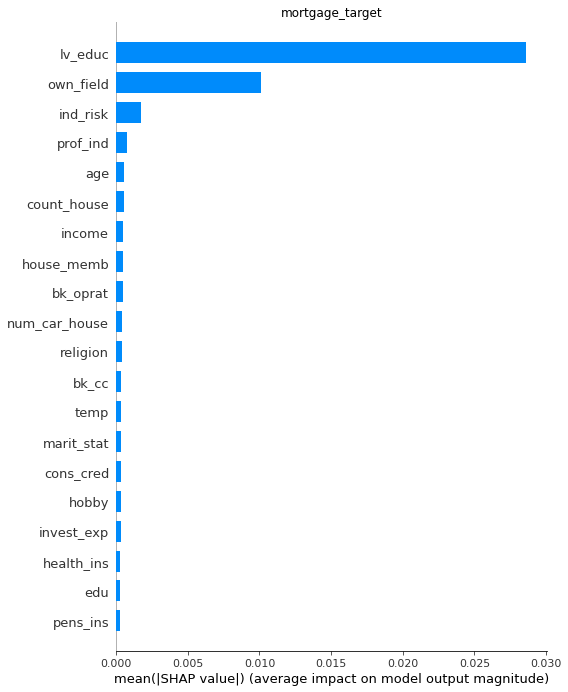

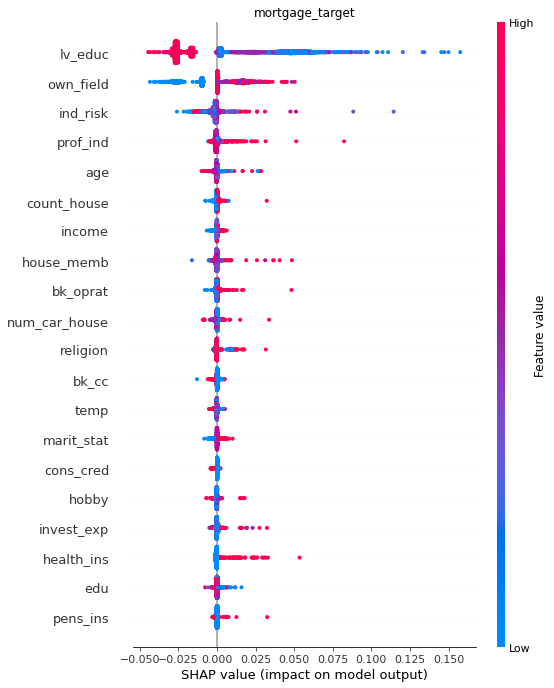

In [44]:
%matplotlib inline
gbc.fit(X_train, y_train_imb)
explainer = shap.TreeExplainer(gbc, X_train, model_output='probability', feature_perturbation='interventional')
shap_values = explainer(X_test)
shap.summary_plot(shap_values, plot_type = 'bar', show = False)
plt.title('mortgage_target')
plt.show()
shap.summary_plot(shap_values, plot_type = 'dot', show = False)
plt.title('mortgage_target')
plt.show()

Even in this case, the features 'lv_educ' and 'own_field' are particularly influential compared to the others

# Hyperparametric optimization

As regards hyperparametric optimization, we deemed it not necessary for the 'balanced' cases since all the models have already high performances. As regards the imbalanced case, for time/hardware contraints, we decided to perform hyperparametric optimization only for the Logistic Regression with class_weight = 'balanced'. 

In [53]:
parameters = [{'solver': ('liblinear', 'lbfgs'), 'C':[1, 10]}]

grid_search = GridSearchCV(estimator = LogisticRegression(random_state=0, max_iter = 5000, class_weight = 'balanced'),  
                           param_grid = parameters,
                           scoring = 'average_precision',
                           verbose=0)

grid = grid_search.fit(X_valid, y_val_imb)
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'solver': 'liblinear'}
0.12325622890402603


We run again Logistic regression with the parameters obtained thorugh hyperparametrization. 

In [54]:
lr_performances_imb_opt = {}
lr = LogisticRegression(random_state=0, max_iter = 5000, class_weight = 'balanced', **grid.best_params_)
lr.fit(X_train, y_train_imb)
y_train_hat = lr.predict(X_train)
y_train_hat_probs = lr.predict_proba(X_train)[:,1]
train_avg_pr = average_precision_score(y_train_imb, y_train_hat_probs)
y_test_hat = lr.predict(X_test)
y_test_hat_probs = lr.predict_proba(X_test)[:,1]
test_avg_pr = average_precision_score(y_test_imb, y_test_hat_probs)
lr_performances_imb_opt['mortgage_target'] = {'train avg pr': train_avg_pr,
                              'test avg pr': test_avg_pr}
lr_performances_imb_opt

{'mortgage_target': {'train avg pr': 0.10090515900912216,
  'test avg pr': 0.08315494049317604}}

As you can see below the performances of Logistic Regression don't change much. We keep anyway for completeness the hyperparametric optimization part in the notebook. 

In [55]:
lrs = ['logistic regression', 'logistic regression optimized']
lrs_imb = pd.DataFrame(data=[lr_performances_imb, lr_performances_imb_opt])
lrs_imb['index'] = lrs
lrs_imb = lrs_imb.set_index('index')
lrs_imb

,mortgage_target
index,
logistic regression,"{'train avg pr': 0.1064814983540973, 'test avg pr': 0.08324629990035239}"
logistic regression optimized,"{'train avg pr': 0.10090515900912216, 'test avg pr': 0.08315494049317604}"
